In [3]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read the CSV with pandas 
#in this example the csv is in same directory as notebook
df = pd.read_csv("week1_task2_water_quality.csv")
df.head()       # first 5 rows (quick peek)

,date,site,parameter,value_mg_L,units
0,2025-01-01,Willow Creek,Nitrate-N (mg/L),3.529,mg/L
1,2025-01-08,Willow Creek,Nitrate-N (mg/L),3.708,mg/L
2,2025-01-15,Willow Creek,Nitrate-N (mg/L),4.245,mg/L
3,2025-01-22,Willow Creek,Nitrate-N (mg/L),4.623,mg/L
4,2025-01-29,Willow Creek,Nitrate-N (mg/L),4.148,mg/L


In [5]:
#Data set info
df.info()       #columns, types, # of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        16 non-null     object 
 1   site        16 non-null     object 
 2   parameter   16 non-null     object 
 3   value_mg_L  14 non-null     float64
 4   units       16 non-null     object 
dtypes: float64(1), object(4)
memory usage: 772.0+ bytes


In [6]:
#Missing values?
print("Missing values per column:")
df.isna().sum()     #how many nulls per column

Missing values per column:


date          0
site          0
parameter     0
value_mg_L    2
units         0
dtype: int64

In [7]:
#Unique values?
print("Unique parameters:", df['parameter'].unique())       #which parameters?
print("Unique sites:", df['site'].unique())      #which sites?

Unique parameters: ['Nitrate-N (mg/L)']
Unique sites: ['Willow Creek']


In [8]:
#Parse Dates and Sort
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce') #format date
df = df.sort_values('date') #sort data by date
df.head()   #display first 5 rows

,date,site,parameter,value_mg_L,units
0,2025-01-01,Willow Creek,Nitrate-N (mg/L),3.529,mg/L
1,2025-01-08,Willow Creek,Nitrate-N (mg/L),3.708,mg/L
2,2025-01-15,Willow Creek,Nitrate-N (mg/L),4.245,mg/L
3,2025-01-22,Willow Creek,Nitrate-N (mg/L),4.623,mg/L
4,2025-01-29,Willow Creek,Nitrate-N (mg/L),4.148,mg/L


In [9]:
#Filter for Site and Parameter
mask = (df['site'] == 'Willow Creek') & (df['parameter'].str.contains('Nitrate', na=False)) #search data for specific site and parameter including Nitrate in name
df_w = df.loc[mask].copy()  #save mask as a copy of the data in df_w
df_w.head() #show first 5 rows

,date,site,parameter,value_mg_L,units
0,2025-01-01,Willow Creek,Nitrate-N (mg/L),3.529,mg/L
1,2025-01-08,Willow Creek,Nitrate-N (mg/L),3.708,mg/L
2,2025-01-15,Willow Creek,Nitrate-N (mg/L),4.245,mg/L
3,2025-01-22,Willow Creek,Nitrate-N (mg/L),4.623,mg/L
4,2025-01-29,Willow Creek,Nitrate-N (mg/L),4.148,mg/L


In [10]:
#Handle Missing Values (interpolates between data points)
df_w['value_mg_L'] = df_w['value_mg_L'].interpolate(method='linear').bfill().ffill() #replaces missing value with linear interpolation between previous and subsequent data available
df_w

,date,site,parameter,value_mg_L,units
0,2025-01-01,Willow Creek,Nitrate-N (mg/L),3.5290,mg/L
1,2025-01-08,Willow Creek,Nitrate-N (mg/L),3.7080,mg/L
2,2025-01-15,Willow Creek,Nitrate-N (mg/L),4.2450,mg/L
3,2025-01-22,Willow Creek,Nitrate-N (mg/L),4.6230,mg/L
4,2025-01-29,Willow Creek,Nitrate-N (mg/L),4.1480,mg/L
5,2025-02-05,Willow Creek,Nitrate-N (mg/L),3.4225,mg/L
6,2025-02-12,Willow Creek,Nitrate-N (mg/L),2.6970,mg/L
7,2025-02-19,Willow Creek,Nitrate-N (mg/L),2.0040,mg/L
8,2025-02-26,Willow Creek,Nitrate-N (mg/L),2.0180,mg/L
9,2025-03-05,Willow Creek,Nitrate-N (mg/L),2.5350,mg/L


In [ ]:
#Add Rolling Mean (new column of data averaging pervious two weeks with present week)
df_w['nitrate_3wk_avg'] = df_w['value_mg_L'].rolling(window=3, min_periods=1).mean()
df_w

,date,site,parameter,value_mg_L,units,nitrate_3wk_avg
0,2025-01-01,Willow Creek,Nitrate-N (mg/L),3.5290,mg/L,3.529000
1,2025-01-08,Willow Creek,Nitrate-N (mg/L),3.7080,mg/L,3.618500
2,2025-01-15,Willow Creek,Nitrate-N (mg/L),4.2450,mg/L,3.827333
3,2025-01-22,Willow Creek,Nitrate-N (mg/L),4.6230,mg/L,4.192000
4,2025-01-29,Willow Creek,Nitrate-N (mg/L),4.1480,mg/L,4.338667
5,2025-02-05,Willow Creek,Nitrate-N (mg/L),3.4225,mg/L,4.064500
6,2025-02-12,Willow Creek,Nitrate-N (mg/L),2.6970,mg/L,3.422500
7,2025-02-19,Willow Creek,Nitrate-N (mg/L),2.0040,mg/L,2.707833
8,2025-02-26,Willow Creek,Nitrate-N (mg/L),2.0180,mg/L,2.239667
9,2025-03-05,Willow Creek,Nitrate-N (mg/L),2.5350,mg/L,2.185667


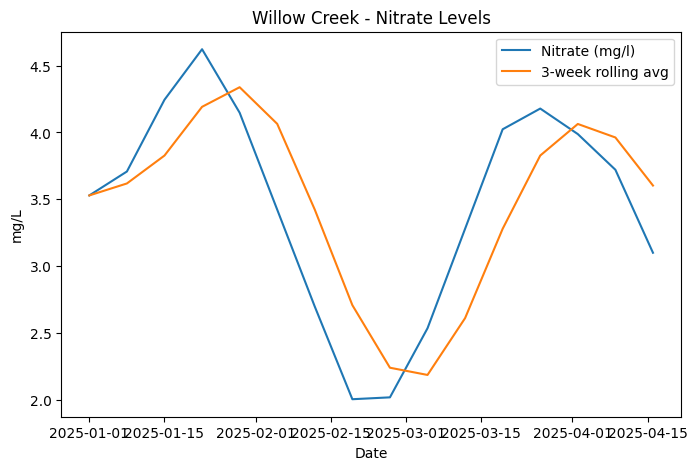

In [ ]:
#Plot data (uses matplotlib.pyplot)
plt.figure(figsize=(8,5))
plt.plot(df_w['date'], df_w['value_mg_L'], label='Nitrate (mg/l)')
plt.plot(df_w['date'], df_w['nitrate_3wk_avg'], label='3-week rolling avg')
plt.title('Willow Creek - Nitrate Levels')
plt.xlabel('Date'); plt.ylabel('mg/L')
plt.legend()
plt.show()


In [13]:
#Save Cleaned Data
df_w.to_csv("week1_task2_water_quality_cleaned.csv", index=False)

In [15]:
#Basic stats function
df['value_mg_L'].describe()

count    14.000000
mean      3.465643
std       0.852896
min       2.004000
25%       2.797750
50%       3.714500
75%       4.117000
max       4.623000
Name: value_mg_L, dtype: float64